 <p style="background-color: limegreen; font-family: arial; font-size: 250%; text-align: center; border-radius: 15px 50px; color: white;">
Spotify and <span style="color: red;">YouTube</span> Analysis
</p>

In [1]:
#kütüphanelerin yüklenmesi
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns 
sns.set_theme(color_codes=True)
import datetime as dt 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore')

# Kolon Açıklamaları

### Genel Bilgiler
- **Unnamed**: Satır sıra numarası.
- **Artist**: Sanatçı adı.
- **Track**: Şarkının adı.
- **Album**: Şarkının yer aldığı albüm.
- **Album type**: Albümün türü.

### Spotify Özellikleri
- **Danceability**: Şarkının dans edilebilirlik derecesi (0-1 arası değer).
- **Energy**: Şarkının enerjisi veya yoğunluğu (0 ile 1 arasında bir değer).
- **Key**: Şarkının tonal anahtarı (0 ile 11 arasında, C=0, C#=1, ..., B=11).
- **Loudness**: Şarkının desibel cinsinden ortalama ses yüksekliği.
- **Speechiness**: Şarkıda konuşma öğelerinin oranı (0 ile 1 arasında bir değer).
- **Acousticness**: Şarkının akustik olma olasılığı (0 ile 1 arasında bir değer).
- **Instrumentalness**: Şarkının enstrümantal olup olmadığının tahmini (0 ile 1 arasında bir değer).
- **Liveness**: Şarkının canlı performans olma olasılığı (0 ile 1 arasında bir değer).
- **Valence**: Şarkının duygusal pozitiflik veya mutluluk derecesi (0 ile 1 arasında bir değer).
- **Tempo**: Şarkının temposu (Beats Per Minute - BPM).
- **Duration_ms**: Şarkının süresi, milisaniye cinsinden.
- **Stream**: Spotify'daki toplam dinlenme sayısı.

### YouTube Özellikleri
- **Title**: YouTube'daki şarkının başlığı.
- **Channel**: Şarkının YouTube'da yüklendiği kanalın adı.
- **Views**: Şarkının YouTube'daki toplam izlenme sayısı.
- **Likes**: Şarkının YouTube'daki toplam beğeni sayısı.
- **Comments**: Şarkının YouTube'daki toplam yorum sayısı.
- **Description**: YouTube'daki şarkının açıklama metni.
- **Licensed**: Şarkının lisanslı olup olmadığını belirten bilgi (True/False gibi).
- **official_video**: Şarkının resmi bir video klip olup olmadığını gösterir (True/False gibi).


In [2]:
df = pd.read_csv("C:\\Users\\Tayfun\\Desktop\\Spotify_Youtube.csv")
df.head(5)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [4]:
#Null değerlerin kontrol edilmesi
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [5]:
# sütunların kontrolü
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [6]:
# unique değerlerin kontrolü
df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [7]:
#Veri çerçevesinde yinelenen satırları bulma
df.duplicated().sum()

0

In [8]:
#veri analizlerinin doğru çıkması için null değerleri siliyorum.
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19170.0,1.043493e+04,5.989699e+03,0.000000,5.240500e+03,1.050050e+04,1.564075e+04,2.071700e+04
Danceability,19170.0,6.211780e-01,1.655325e-01,0.000000,5.200000e-01,6.390000e-01,7.420000e-01,9.750000e-01
Energy,19170.0,6.361500e-01,2.134395e-01,0.000020,5.100000e-01,6.670000e-01,7.980000e-01,1.000000e+00
Key,19170.0,5.292645e+00,3.579947e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,19170.0,-7.615305e+00,4.617605e+00,-46.251000,-8.745000e+00,-6.504000e+00,-4.918500e+00,9.200000e-01
Speechiness,19170.0,9.494369e-02,1.049305e-01,0.000000,3.570000e-02,5.060000e-02,1.040000e-01,9.640000e-01
Acousticness,19170.0,2.878165e-01,2.856304e-01,0.000001,4.360000e-02,1.880000e-01,4.690000e-01,9.960000e-01
Instrumentalness,19170.0,5.547562e-02,1.927683e-01,0.000000,0.000000e+00,2.370000e-06,4.357500e-04,1.000000e+00
Liveness,19170.0,1.913219e-01,1.652175e-01,0.014500,9.410000e-02,1.250000e-01,2.340000e-01,1.000000e+00
Valence,19170.0,5.282674e-01,2.449960e-01,0.000000,3.380000e-01,5.350000e-01,7.240000e-01,9.930000e-01


In [11]:
#İhtiyaç dışı kolonların silinmesi
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(url_cols, axis=1, inplace=True)

In [12]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [13]:
# album_type adetlerinin incelenmesi
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

album          13845
single          4636
compilation      689
Name: Album_type, dtype: int64


# --------------------------------------------------------------------------------------------------------------

# 1-Veri setindeki şarkıların toplam izlenme(Youtube) ve dinlenme(Spotify) sayılarının karşılaştırması

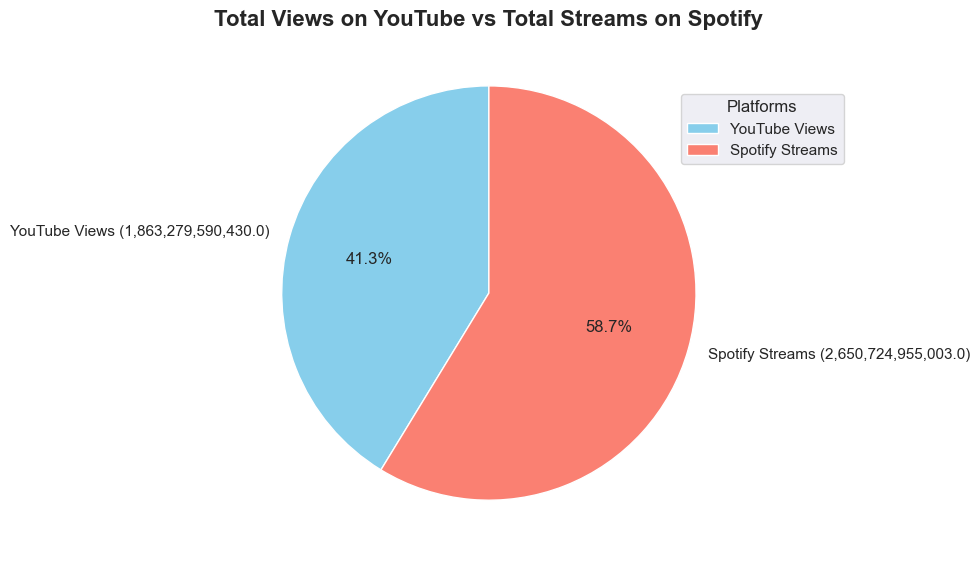

In [14]:
# YouTube ve Spotify toplam izlenme/dinlenme sayıları
youtube_total_views = df['Views'].sum()
spotify_total_streams = df['Stream'].sum()

# Pasta grafiği için veriler
platforms = ['YouTube Views', 'Spotify Streams']
totals = [youtube_total_views, spotify_total_streams]

# Pasta grafiği oluşturma
plt.figure(figsize=(9, 8))
wedges, texts, autotexts = plt.pie(
    totals,
    labels=[f"{platform} ({total:,})" for platform, total in zip(platforms, totals)],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon']
)

# Başlık
plt.title('Total Views on YouTube vs Total Streams on Spotify', fontsize=16, fontweight='bold')

# Legend ekleme (sağ üst köşeye yerleştirme)
plt.legend(wedges, platforms, title="Platforms", loc="upper right", bbox_to_anchor=(1.2, 0.9))

plt.tight_layout()
plt.show()


## --Yorum:Spotify ve Youtube şarkı etkileşimi için dinlenme ve izlenme rakamlarını karşılaştırdığımızda spotify %58,7 oranı ile youtubenin önünde görünüyor.Spotify in kullanım kolaylığı şarkıların dinleyiciye daha kolayca ulaşmasını sağlamıştır.

# -----------------------------------------------------------------------------------------------------------

# 2-Youtubede en çok izlenen ilk 10 şarkı ile Spotify da en çok dinlenen ilk 10 şarkının karşılaştırılması

In [15]:
# YouTube'da en çok izlenen ilk 10 şarkıyı seç
top10_youtube_tracks = df.nlargest(10, 'Views')['Track']

# Spotify'da en çok dinlenen ilk 10 şarkıyı seç
top10_spotify_tracks = df.nlargest(10, 'Stream')['Track']

# Kesişim kümesini bul (ortak şarkılar)
common_tracks = set(top10_youtube_tracks).intersection(set(top10_spotify_tracks))

# Ortak şarkıları liste olarak göster
common_tracks_list = list(common_tracks)
print("Ortak Şarkılar:", common_tracks_list)


Ortak Şarkılar: ['Shape of You']


### Youtube ve spotify ın top 10 unda ortak tek şarkı Shape of You olarak görülmektedir.

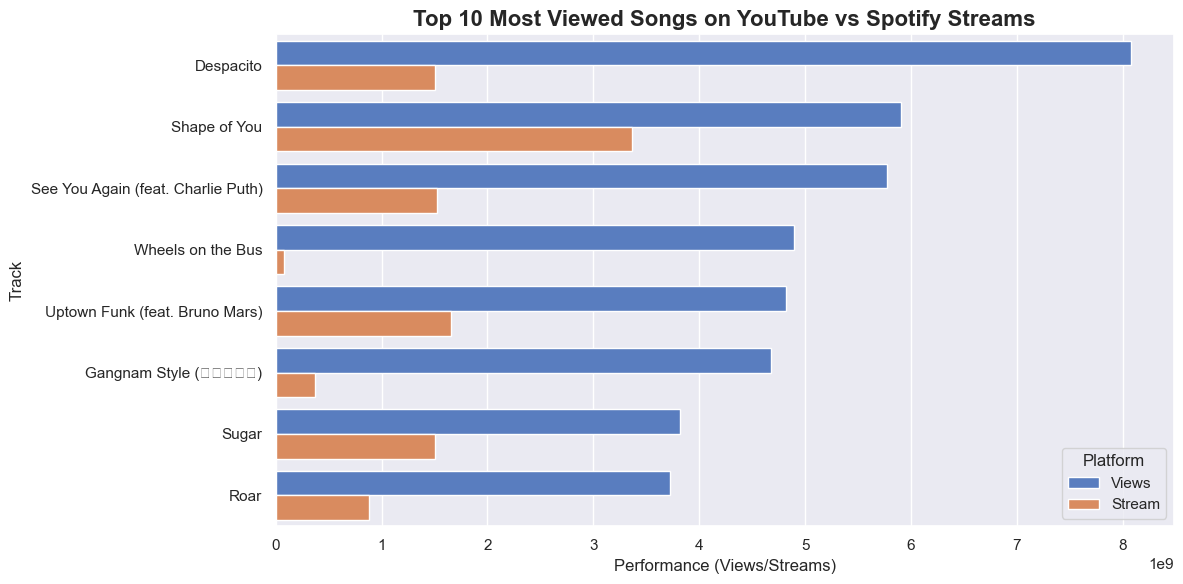

In [16]:


# YouTube'da en çok izlenen ilk 10 şarkıyı seç
top10_youtube = df.nlargest(10, 'Views')

# Veri hazırlığı: YouTube ve Spotify verilerini karşılaştırmak için uzun forma dönüştürme
top10_melted = top10_youtube.melt(id_vars="Track", value_vars=["Views", "Stream"],
                                  var_name="Platform", value_name="Performance")

# Grafik oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x="Performance", y="Track", hue="Platform", data=top10_melted, palette="muted")

# Başlık ve etiketler
plt.title("Top 10 Most Viewed Songs on YouTube vs Spotify Streams", fontsize=16, fontweight="bold")
plt.xlabel("Performance (Views/Streams)", fontsize=12)
plt.ylabel("Track", fontsize=12)

# Görsel düzenleme
plt.legend(title="Platform", loc="best")
plt.tight_layout()

plt.show()



### Yorum:Youtubede izlenen şarkılardan Wheels on the bus un spotify izlenmesi çok az görünüyor.Bu şarkının spotify da listelenmesi gecikmiş olabilir

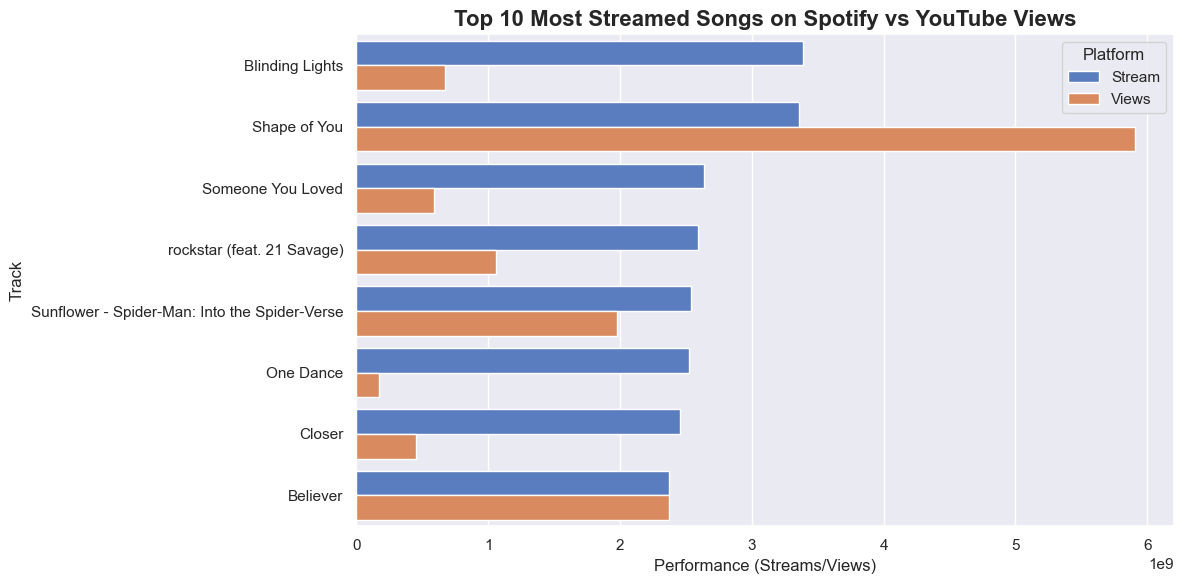

In [17]:
# Spotify'da en çok dinlenen ilk 10 şarkıyı seç
top10_spotify = df.nlargest(10, 'Stream')

# Veri hazırlığı: Spotify ve YouTube verilerini karşılaştırmak için uzun forma dönüştürme
top10_melted = top10_spotify.melt(id_vars="Track", value_vars=["Stream", "Views"],
                                  var_name="Platform", value_name="Performance")

# Grafik oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x="Performance", y="Track", hue="Platform", data=top10_melted, palette="muted")

# Başlık ve etiketler
plt.title("Top 10 Most Streamed Songs on Spotify vs YouTube Views", fontsize=16, fontweight="bold")
plt.xlabel("Performance (Streams/Views)", fontsize=12)
plt.ylabel("Track", fontsize=12)

# Görsel düzenleme
plt.legend(title="Platform", loc="best")
plt.tight_layout()

plt.show()


### Yorum:Spotify da dinlenen One Dance şarkısının youtube izlenme oranı çok düşük görünüyor.Youtube videolarında görsel bir sunum yapılmaması veya iyi bir sunum yapılamamış olabilir.Believer şarkısının youtube ve spotify performansı eşit görülüyor.Bu da dinleyici kitlesinin iki platformdada benzer olabileceğini göstermektedir.

# -----------------------------------------------------------------------------------------------------------

# 3-Albüm tiplerinin incelenmesi

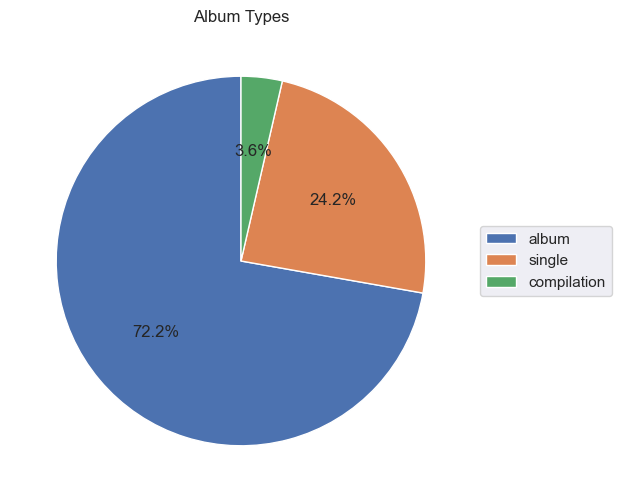

In [18]:

# Pie chart verileri
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)

# Başlık ve açıklamalar
ax.set_title('Album Types')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Açıklamaları sağa taşır

plt.show()


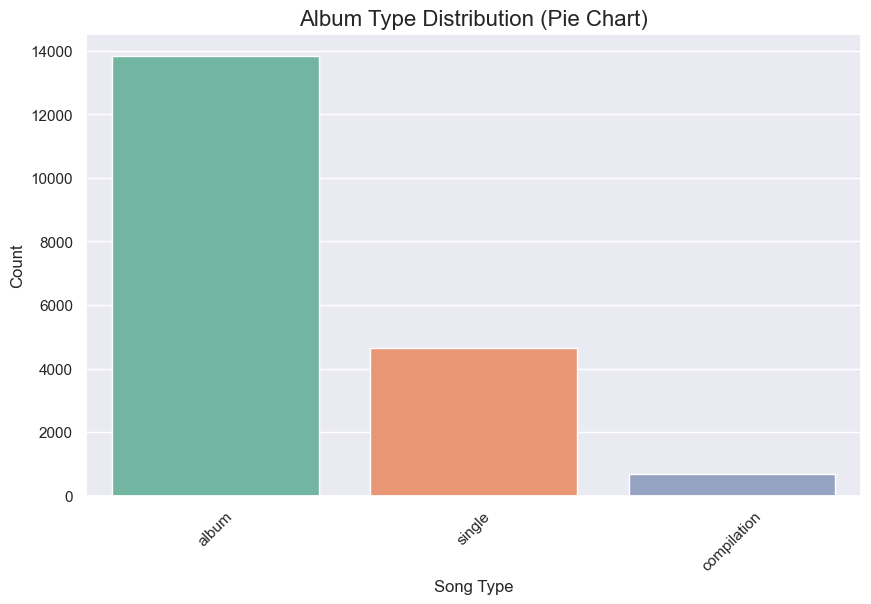

In [19]:
# Albüm Türü Dağılımı için çubuk grafik
plt.figure(figsize=(10,6))
sns.countplot(x='Album_type', data=df, palette='Set2')
plt.title('Album Type Distribution (Pie Chart)', fontsize=16)
plt.xlabel('Song Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


### Yorum:Veriler incelendiği zaman en çok tercih edilen albüm tipinin album olduğu compilation(farklı sanatçıların bir arada olduğu çalışma) çok fazla yapılamadığı için düşük görünmüştür

# ------------------------------------------------------------------------------------------------------

# 4-Youtube ve Spotify da sanatçıların ilk 10 izlenme(views) ve dinlenme(stream) oranları

In [20]:
# "Şarkıları sanatçıya göre gruplandırma ve YouTube izlenmeleri (Views) ile Spotify dinlenmeleri (Stream) değerlerini toplama."
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()

# Sanatçıları izlenme ve dinlenme toplamlarına göre azalan sırada sıralama
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# YouTube'da en fazla izlenme ve Spotify'da en fazla dinlenme sayısına sahip ilk 10 sanatçıyı alma
top_10 = artist_sorted.head(10)

top_10

,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099079e+10,1.012190e+10
Daddy Yankee,1.086828e+10,4.937464e+09
Bruno Mars,1.023184e+10,9.963335e+09
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


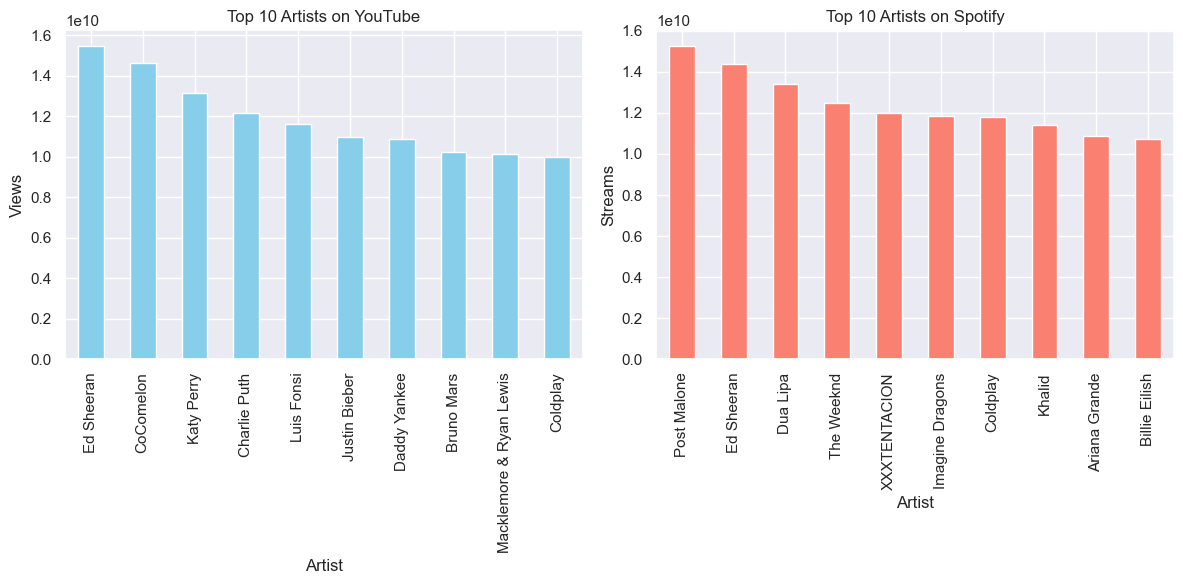

In [21]:


# En fazla izlenme ve dinlenmeye göre ilk 10 sanatçı
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

# Grafik oluşturma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# YouTube için top 10 sanatçı grafiği
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1, color='skyblue')

# Spotify için top 10 sanatçı grafiği
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2, color='salmon')

# Etiketler
ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')

# Grafik düzeni
fig.tight_layout()
plt.show()


## YORUM : 'Ed Sheeran' her iki platformda da en üst sıralarda yer alıyor, bu da hem YouTube hem de Spotify'da geniş bir kitleye hitap ettiğini gösteriyor. 'CoComelon' YouTube'da oldukça popüler olmasına rağmen, Spotify'da bulunmuyor, bu da içerik türüyle ilgili olabilir (çocuk videoları). 'Post Malone' ve 'Dua Lipa' gibi sanatçılar ise Spotify'da daha ön planda, bu da müzik platformları arasındaki içerik tüketimi farkını gösteriyor. 'Coldplay' her iki platformda da ilk 10'da yer alıyor, bu da geniş bir kitleye hitap eden uzun soluklu bir grup olduklarını gösteriyor.

# -----------------------------------------------------------------------------------------------

# 5-Youtube en çok izlenen,en çok yorum alan ve en fazla beğeni alan ilk 10 şarkının incelenmesi

In [22]:
# Top 10 en çok izlenen şarkılar
top10_views = df.nlargest(10, 'Views')

# Top 10 en çok yorum alan şarkılar
top10_comments = df.nlargest(10, 'Comments')

# Top 10 ençok like alan şarkılar
top10_likes = df.nlargest(10, 'Likes')

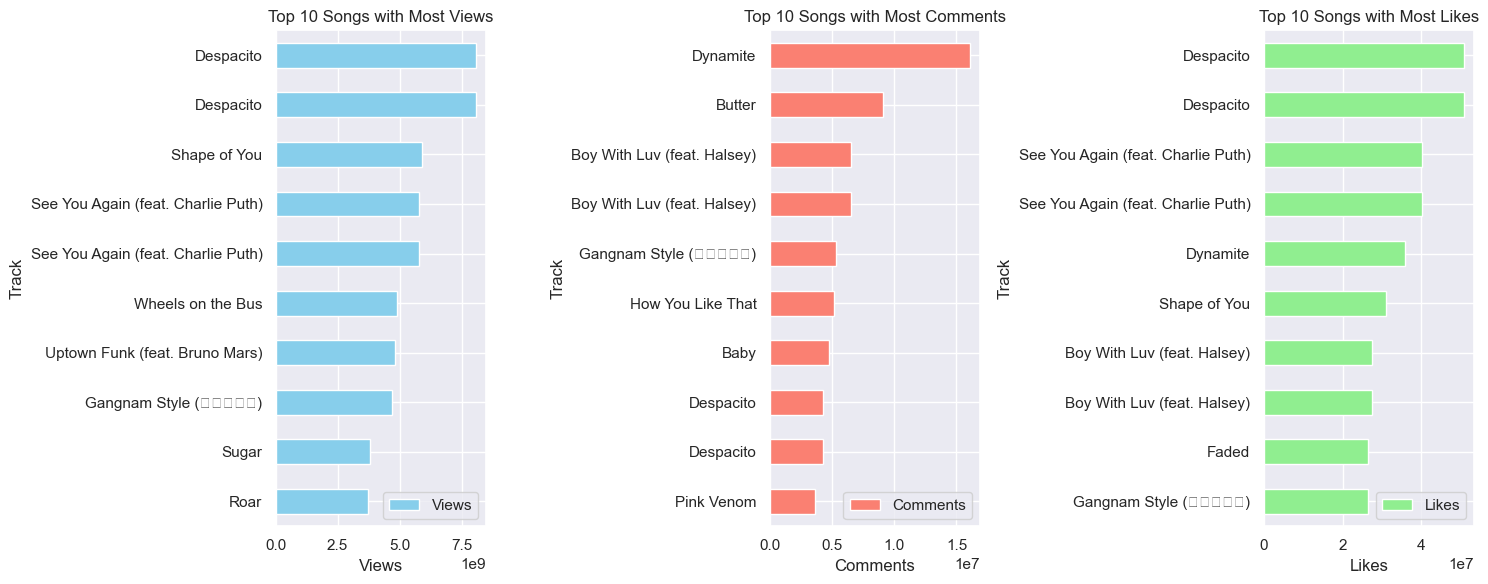

In [23]:
# Top 10 hazırlıkları
top10_views = df.nlargest(10, 'Views')
top10_comments = df.nlargest(10, 'Comments')
top10_likes = df.nlargest(10, 'Likes')

# Grafik oluşturma
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Top 10 en çok izlenen şarkılar
top10_views = top10_views.sort_values('Views', ascending=True)  # Barların sırasını ters çevir
top10_views.plot(kind='barh', x='Track', y='Views', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Songs with Most Views')
axs[0].set_xlabel('Views')

# Top 10 en çok yorum alan şarkılar
top10_comments = top10_comments.sort_values('Comments', ascending=True)
top10_comments.plot(kind='barh', x='Track', y='Comments', ax=axs[1], color='salmon')
axs[1].set_title('Top 10 Songs with Most Comments')
axs[1].set_xlabel('Comments')

# Top 10 en çok beğeni alan şarkılar
top10_likes = top10_likes.sort_values('Likes', ascending=True)
top10_likes.plot(kind='barh', x='Track', y='Likes', ax=axs[2], color='lightgreen')
axs[2].set_title('Top 10 Songs with Most Likes')
axs[2].set_xlabel('Likes')

# Grafik düzenleme
fig.tight_layout()
plt.show()


## Yorum :En çok izlenen ve like alan shape of you şarkısının yeterince yorum almadığını görüyoruz.Bu şarkının  dinleyici kitlesi ile alakalı olduğu değerlendirilebilir.Gangamstyle şarkısının yorum sırasının like ve izlenme oranına göre yukarıda olması şarkının etkisinin izleyicileri yorum yapmaya ittiğini gösteriyor.

# --------------------------------------------------------------------------------------------------------

# 6-Dinlenme sayısına göre en iyi 10 şarkının Energy ,danceability ,acousticness özelliklerinin incelenmesi

In [24]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.730,0.514,0.00146
12452,Shape of You,0.652,0.825,0.58100
19186,Someone You Loved,0.405,0.501,0.75100
17937,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,One Dance,0.625,0.792,0.00776
16099,Closer,0.524,0.748,0.41400
16028,Closer,0.524,0.748,0.41400
14030,Believer,0.780,0.776,0.06220


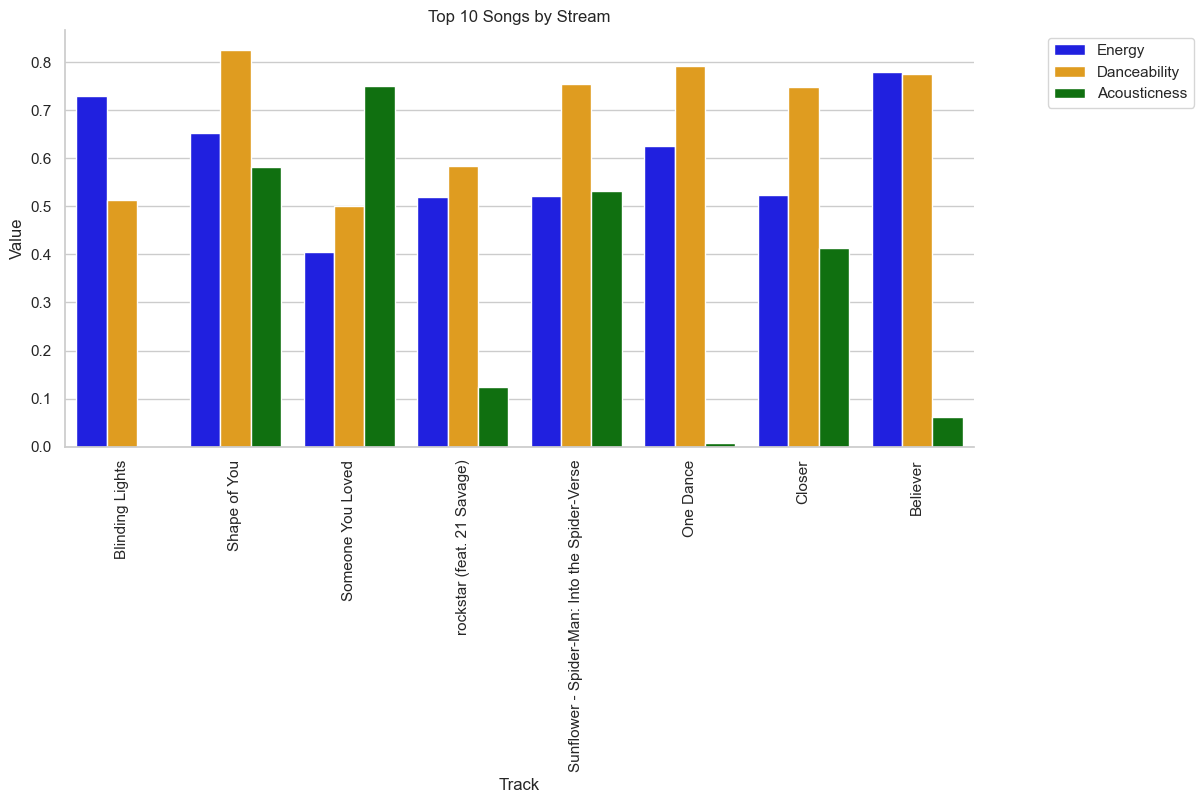

In [25]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

## Yorum:Energy ve Danceability genellikle birbiriyle ilişkili gibi görünüyor. İlk 10 şarkının hem yüksek enerjisi hem de dansa uygun yapısının olduğu görülüyor.Yüksek enerjili şarkıların dinlenme oranının arttığı değerlendirilebilir.Acousticness arttıkça genel olarak enerjide düşüş gözlemleniyor.


# ---------------------------------------------------------------------------------------------------------

# 7-Youtubede en çok izlenen ilk 10 kanalın incelenmesi

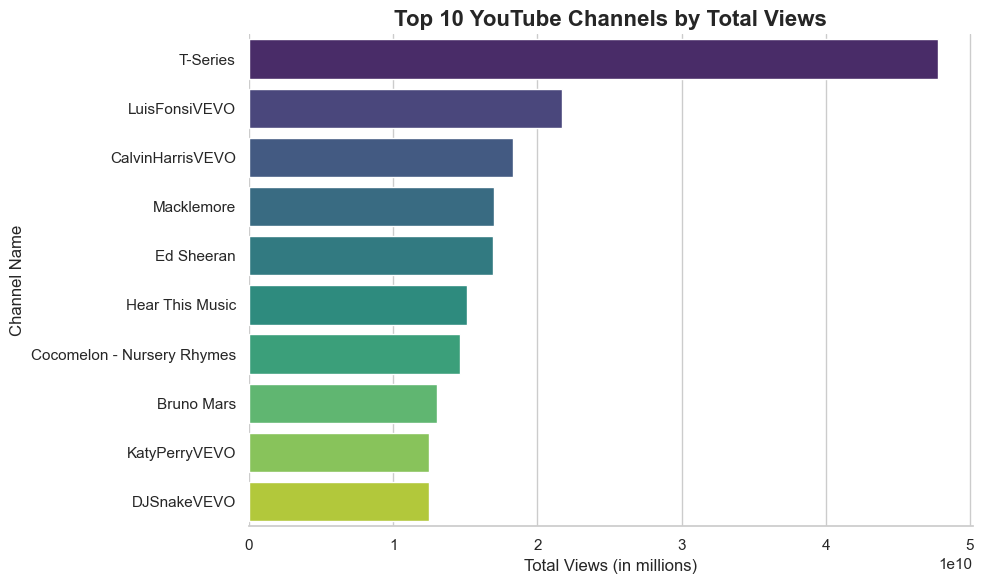

In [26]:

# Kanalları gruplandır ve toplam izlenmeleri hesapla
df_channels = df.groupby("Channel")["Views"].sum().reset_index()

# İzlenme sayılarına göre sırala ve en popüler 10 kanalı seç
df_sort_channels = df_channels.sort_values("Views", ascending=False).head(10)

# Grafik için ayarlar
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Bar grafiği
sns.barplot(x="Views", y="Channel", data=df_sort_channels, palette="viridis")

# Başlık ve eksen etiketleri
plt.title("Top 10 YouTube Channels by Total Views", fontsize=16, fontweight="bold")
plt.xlabel("Total Views (in millions)", fontsize=12)
plt.ylabel("Channel Name", fontsize=12)

# Görseli iyileştirme
sns.despine(left=True)
plt.tight_layout()

plt.show()


# ------------------------------------------------------------------------------------------------

#  8-Youtube izlenme sayısına göre en popüler ilk 10 sanatçının Youtube ve Spotify performanslarının değerlendirilmesi

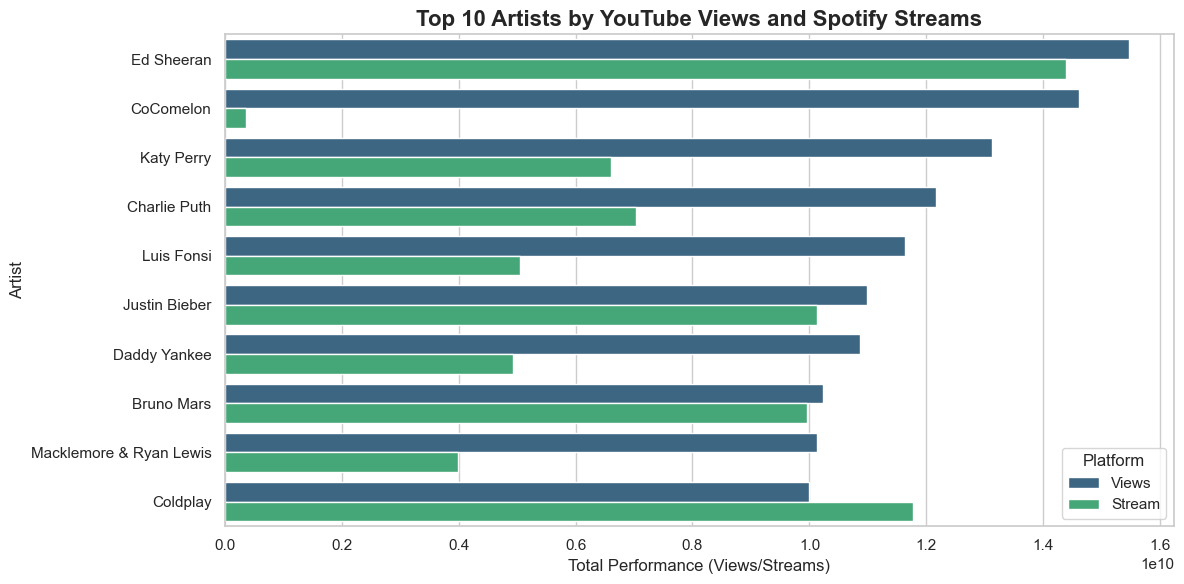

In [27]:


# Sanatçılar bazında toplam izlenme ve dinlenme sayıları
artist_analysis = df.groupby('Artist')[['Views', 'Stream']].sum().reset_index()

# En popüler 10 sanatçıyı seç
top10_artists = artist_analysis.nlargest(10, 'Views')

# Veri hazırlığı: Uzun forma dönüştürme
top10_melted = top10_artists.melt(id_vars='Artist', value_vars=['Views', 'Stream'],
                                  var_name='Platform', value_name='Performance')

# Grafik oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x='Performance', y='Artist', hue='Platform', data=top10_melted, palette='viridis')

# Başlık ve etiketler
plt.title('Top 10 Artists by YouTube Views and Spotify Streams', fontsize=16, fontweight='bold')
plt.xlabel('Total Performance (Views/Streams)', fontsize=12)
plt.ylabel('Artist', fontsize=12)

# Görsel düzenleme
plt.legend(title='Platform', loc='best')
plt.tight_layout()

plt.show()


## Yorum:CoComelon un spotify performansı çok düşük gözüküyor.CoComelon un içeriklerinin genellikle animasyon videolarından oluşması nedeniyle spotify performansının düşük olduğu değerlendirilmiştir.Ed Sheeranın her iki platformdada başarılı olduğu görülüyor.Coldplay in ise spotify performansı youtubeden fazla görünüyor.Bunun sebebi olarak Coldplay in spotify en popüler şarkılar listesinde sürekli görünmesi olarak değerlendirilebilir.

# -------------------------------------------------------------------------------------------------

# 8-Korelasyon matris analizi

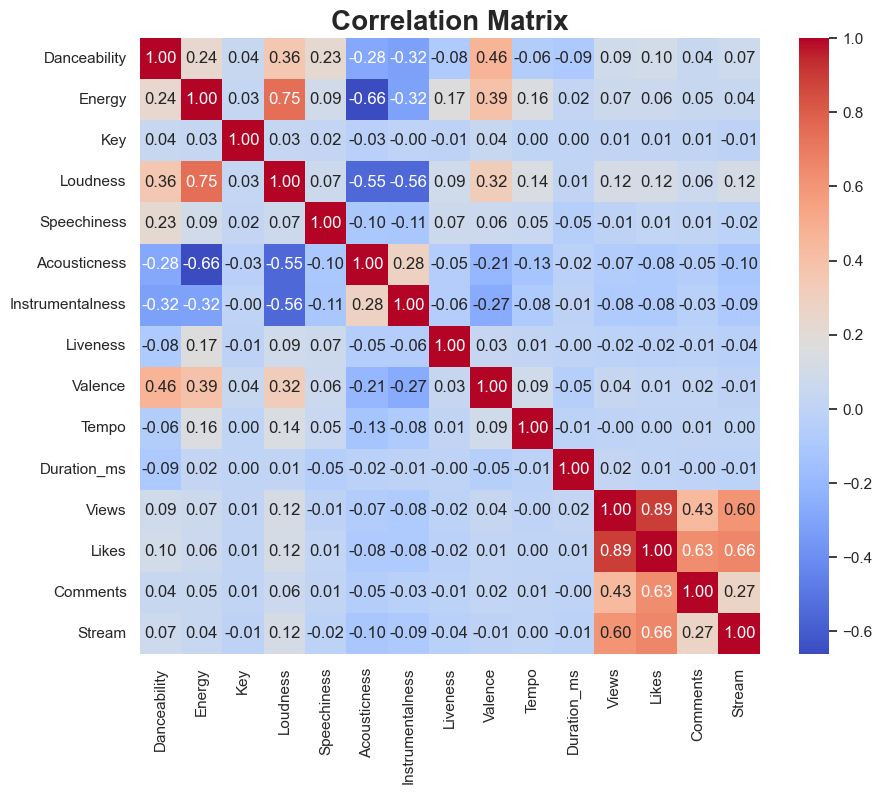

In [28]:



# Korelasyon matrisi oluşturma
correlation_matrix = df.corr()

# Korelasyon grafiği (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Başlık
plt.title("Correlation Matrix", fontsize=20, fontweight="bold")
plt.show()


## Yorum:

### 1. **Views, Likes ve Comments Arasındaki Güçlü İlişki:**
- **Views , Likes  ve Comments  arasında güçlü bir pozitif korelasyon olduğu görülmektedir.
- **Views** ve **Likes** arasında **0.89** gibi çok yüksek bir korelasyon değeri var. Bu, izlenme sayısı arttıkça beğeni sayısının artışı olarak karşımıza çıkıyor
- **Likes** ve **Comments** arasında **0.63** korelasyon değeri, beğenilen şarkıların daha fazla beğeni aldığını gösteriyor gö
---
### 2. **Danceability (Dans Edilebilirlik) ve Valence (Pozitiflik) Arasındaki İlişki:**
- **Danceability** ve **Valence** arasında **0.46** korelasyon görünüyor.Çok güçlü bir korelasyon olarak değerlendiremeyiz
### 3. **Energy (Enerji) ve Loudness (Ses Seviyesi):**
- **Energy** ve **Loudness** arasında oldukça yüksek (**0.75**) bir pozitif korelasyon var.
- Enerjisi yüksek şarkılar ile yüksek sesin birbiri ile ilişkili olduğunu değerlendirebiliriz



# ------------------------------------------------------------------------------------------

# 9-Ed Sheeran'ın en popüler şarkıları

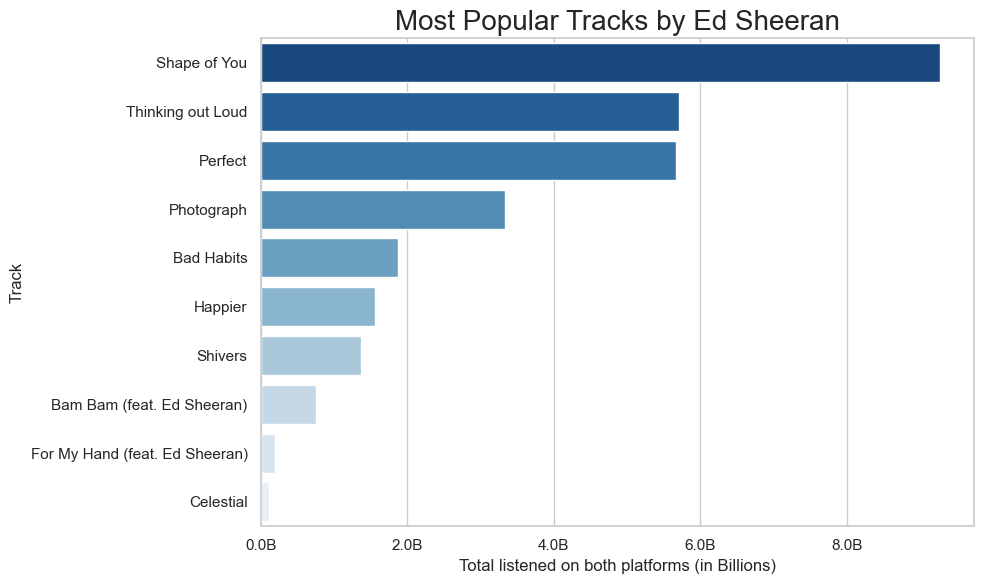

In [30]:
from matplotlib.ticker import FuncFormatter

# Ed Sheeran verilerini filtreleme
ed_sheeran = df.groupby(['Artist', 'Track']).sum().reset_index()
ed_sheeran = ed_sheeran[ed_sheeran['Artist'] == 'Ed Sheeran']
ed_sheeran['TotalListened'] = ed_sheeran['Views'] + ed_sheeran['Stream']
ed_sheeran = ed_sheeran.sort_values('TotalListened', ascending=False)

# Milyar formatlayıcı tanımlama
formatter = FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B')

# Grafik oluşturma
plt.figure(figsize=(10, 6))
fig = sns.barplot(data=ed_sheeran, x='TotalListened', y='Track', palette='Blues_r')
fig.xaxis.set_major_formatter(formatter)  # Formatlayıcıyı eksene uygulama
fig.set_xlabel("Total listened on both platforms (in Billions)", fontsize=12)
fig.set_ylabel("Track", fontsize=12)
fig.set_title("Most Popular Tracks by Ed Sheeran", fontsize=20)

# Görsel düzenleme
plt.tight_layout()
plt.show()


### Yorum: En popüler şarkıcı Ed SHEERAN ın her iki platformda en çok puan alan ilk üç şarkısı Shape of you,Thinking out loud ve Perfect dir.

# ---------------------------------------------------------------------------------------

# 10-Views,Likes,Comments Top 10 Sıralamaları

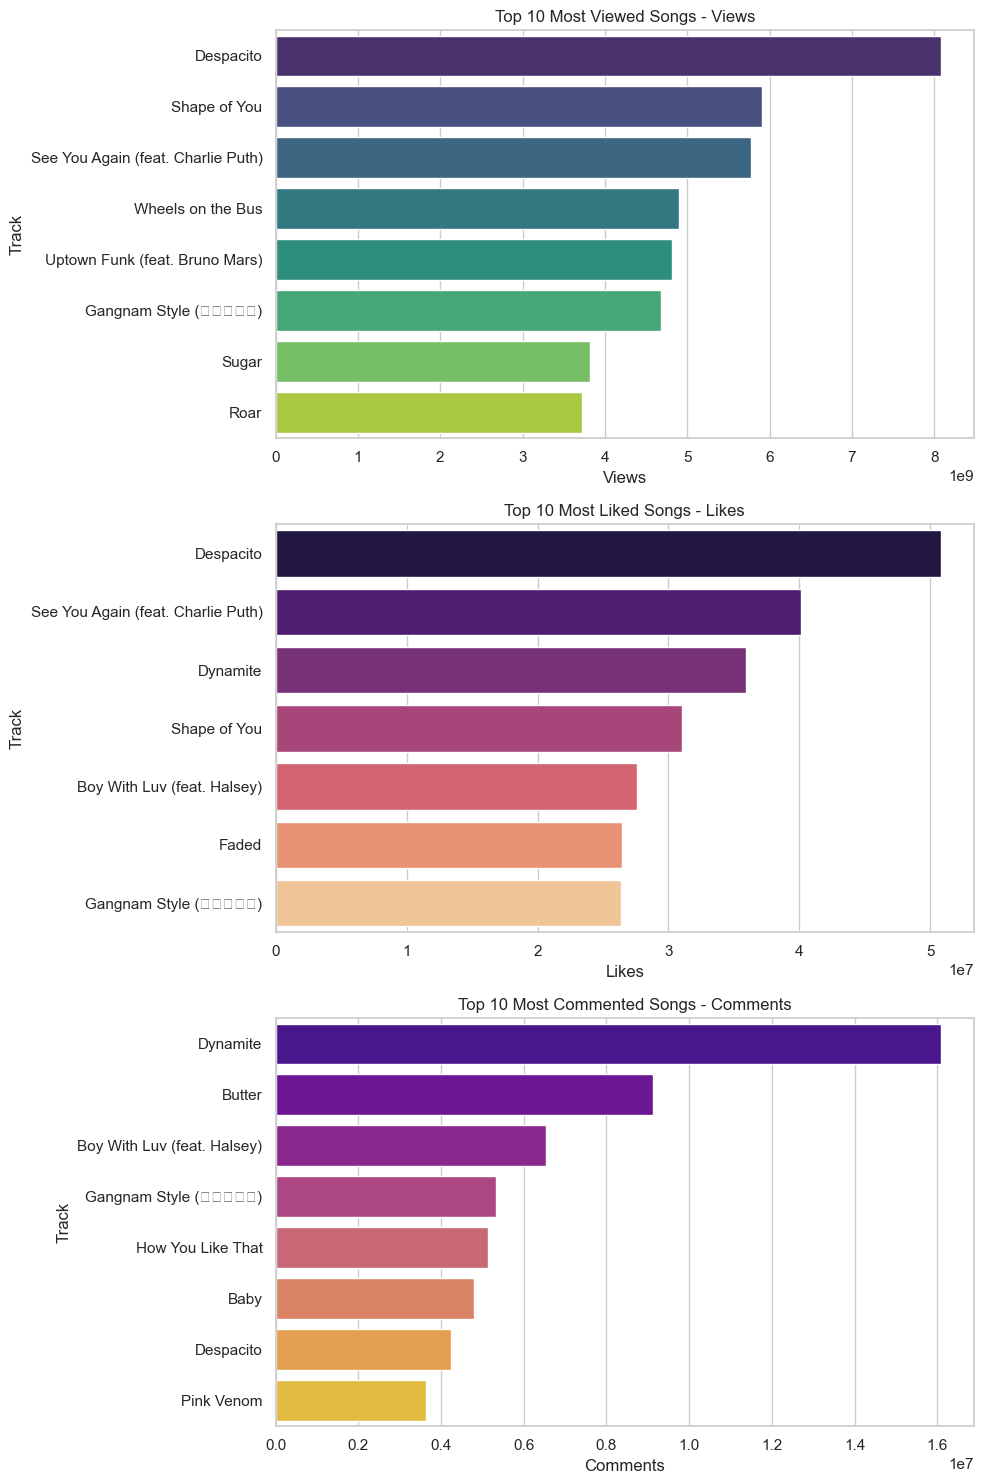

In [31]:
top10_views = df.sort_values(by='Views', ascending=False).head(10)
top10_likes = df.sort_values(by='Likes', ascending=False).head(10)
top10_comments = df.sort_values(by='Comments', ascending=False).head(10)

plt.figure(figsize=(10, 15))

# Views Barplot
plt.subplot(3, 1, 1)
sns.barplot(x=top10_views['Views'], y=top10_views['Track'], palette='viridis')
plt.title('Top 10 Most Viewed Songs - Views')
plt.xlabel('Views')
plt.ylabel('Track')

# Likes Barplot
plt.subplot(3, 1, 2)
sns.barplot(x=top10_likes['Likes'], y=top10_likes['Track'], palette='magma')
plt.title('Top 10 Most Liked Songs - Likes')
plt.xlabel('Likes')
plt.ylabel('Track')

# Comments Barplot
plt.subplot(3, 1, 3)
sns.barplot(x=top10_comments['Comments'], y=top10_comments['Track'], palette='plasma')
plt.title('Top 10 Most Commented Songs - Comments')
plt.xlabel('Comments')
plt.ylabel('Track')

plt.tight_layout()
plt.show()

### Yorum :Despacito şarkısı en çok izlenme ve en çok like alanların başında görülüyor.Dynamite şarkısı ise en çok yorum alan şarkı olarak dikkat çekmektedir.

# -------------------------------------------------------------------------------------------

# 11-Şarkı sürelerinin incelenmesi 

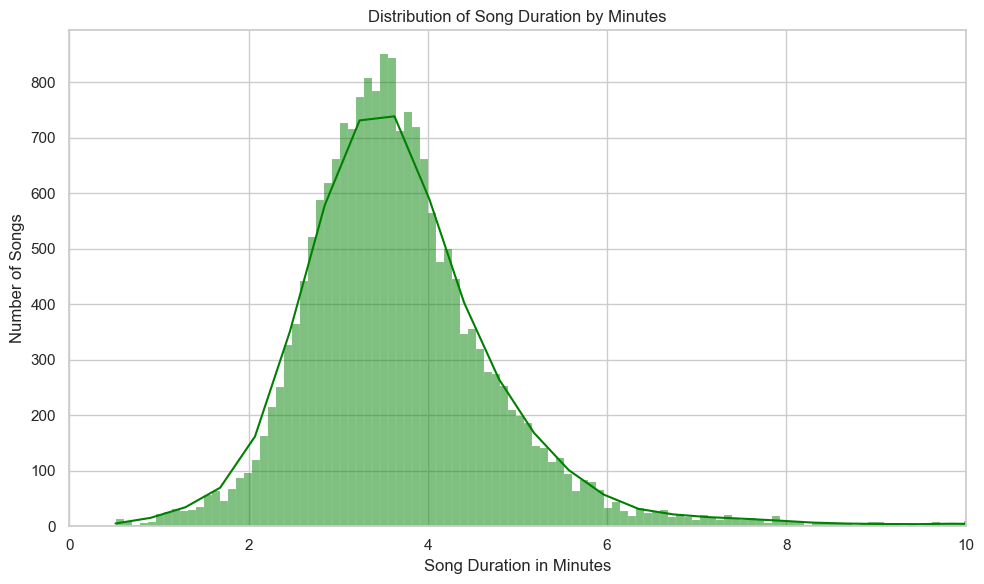

In [32]:


# Şarkı süresini dakika cinsine dönüştürme
if 'Duration_Minutes' not in df.columns:
    df['Duration_Minutes'] = df['Duration_ms'] / 60000  # Milisaniyeden dakikaya dönüşüm

# Şarkı Süresi Dağılımı (Histogram)
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="Duration_Minutes", ax=ax, kde=True, color='green')

# Grafik ayarları
ax.set(
    xlabel='Song Duration in Minutes', 
    ylabel='Number of Songs', 
    title='Distribution of Song Duration by Minutes', 
    xlim=(0, 10)  # X ekseni için sınırlar (0-10 dakika)
)

# Görsel düzenleme ve gösterim
plt.tight_layout()
plt.show()


### Yorum:Şarkı sürelerinin yoğunlaştığı yer 3 ile 5 dk arasında göünüyor.İnsanların dinlemeyi tercih ettiği şarkı süresi bu kriterler arasındadır tespiti yapılabilir.